Given an undirected tree consisting of n vertices numbered from 0 to n-1, which has some apples in their vertices. You spend 1 second to walk over one edge of the tree. Return the minimum time in seconds you have to spend to collect all apples in the tree, starting at vertex 0 and coming back to this vertex.

The edges of the undirected tree are given in the array edges, where edges[i] = [ai, bi] means that exists an edge connecting the vertices ai and bi. Additionally, there is a boolean array hasApple, where hasApple[i] = true means that vertex i has an apple; otherwise, it does not have any apple.

 

Example 1:

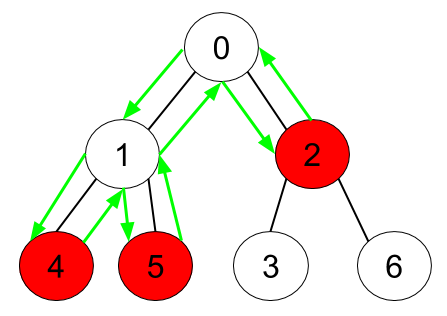

Input: n = 7, edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]], hasApple = [false,false,true,false,true,true,false]
Output: 8 
Explanation: The figure above represents the given tree where red vertices have an apple. One optimal path to collect all apples is shown by the green arrows.  

Example 2:

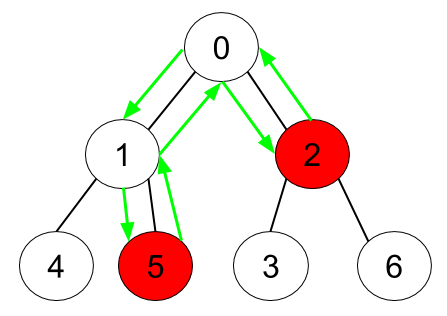

Input: n = 7, edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]], hasApple = [false,false,true,false,false,true,false]
Output: 6
Explanation: The figure above represents the given tree where red vertices have an apple. One optimal path to collect all apples is shown by the green arrows.  

Example 3:

Input: n = 7, edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]], hasApple = [false,false,false,false,false,false,false]
Output: 0

 

Constraints:

    1 <= n <= 105
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai < bi <= n - 1
    fromi < toi
    hasApple.length == n



In [ ]:
class Solution:
    def minTime(self, n: int, edges: List[List[int]], hasApple: List[bool]) -> int:
        tree = defaultdict(list)
        for s, e in edges:
            tree[s].append(e)
            tree[e].append(s)
        
        def dfs(node, parent):
            res = 0
            for neighbour in tree[node]:
                if neighbour != parent:
                    res += dfs(neighbour, node)
            
            if res > 0 or hasApple[node]:
                return res + 2
            
            return res
        
        return max(dfs(0, -1) - 2, 0)